<a href="https://colab.research.google.com/github/AnIsAsPe/Algebra_lineal-para-ML/blob/main/Compresi%C3%B3n_de_im%C3%A1genes_PCA_Raya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Lectura y exploración de imagen

In [2]:
raya = plt.imread('/content/drive/MyDrive/Datos/Raya.jpeg')
print(raya.shape)

(1280, 960, 3)


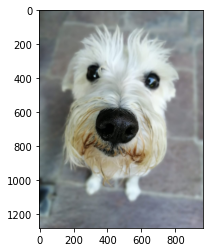

In [3]:
fig= plt.figure(figsize=(6,4))
plt.imshow(raya)

In [4]:
print('Maximo: ', raya.max())
print('Mínimo: ', raya.min())
print('Media: ', raya.mean())


Maximo:  255
Mínimo:  0
Media:  140.60313449435765


#### separa_canal()

In [5]:
def separa_canal(imagen, canal):
  c = imagen[:, :, canal]
  z = np.zeros_like(c)
  vec = np.array([(c, z, z),(z, c, z), (z, z, c)])
  img_canal = np.transpose(vec[canal],
                           ( 1, 2, 0))
  return img_canal


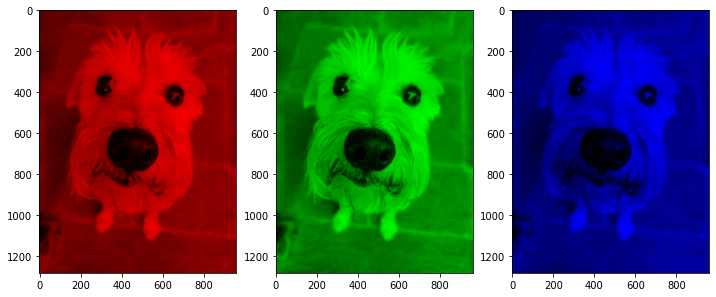

In [6]:
fig, subplots = plt.subplots(1,3, figsize=(12,6))
colores = ['rojo','verde','azul']
rgb = [0, 1, 2]

for canal, ax in zip(rgb, subplots):
  plt.subplot(ax)
  plt.imshow(separa_canal(raya,canal))

## Transformar a escala de grises

(1280, 960)


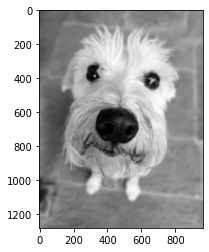

In [7]:
pesos_rgb = [1/3, 1/3, 1/3]  #  https://en.wikipedia.org/wiki/Grayscale
raya_bn = np.dot(raya, pesos_rgb)
print(raya_bn.shape)

fig= plt.figure(figsize=(6,4))
plt.imshow(raya_bn, cmap=plt.cm.gray)
plt.show()

# PCA para una imágen con numpy

#### componentes_principales()

In [8]:
def componentes_principales(X, k=None):
  '''función que devuelve la proyección de las observaciones en X en un espacio
  reducido de  k componentes principales.
  X es la matriz de n renglones y d columnas
  k es el número de componentes al que se quiere reducir la dimencion.
      cuando k es nulo, k = d.
  '''
  n, d = X.shape
  if k==None:
    k = d
  # La matriz X debe estar centrada en 0
  assert np.allclose(X.mean(axis=0), np.zeros(d)), "la matriz no está centrada en 0"  #evalua que esté centrada
  # Matriz de covarianaza
  C = np.matmul(X.T, X) / (n)
  # Eigen decompositiones
  eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Ordenar los eigen valores y eigen vectores 
  idx = np.argsort(eigen_vals)[::-1]
  eigen_vals[idx]
  eigen_vecs[:,idx]
  # Projecta X en el espacio de componentes principales
  eigen_vals = eigen_vals[range(k)]
  eigen_vecs = eigen_vecs[:,range(k)]
  X_pca= np.matmul(X, eigen_vecs)
  return X_pca, eigen_vecs, eigen_vals

## Centrar en 0 nuestras dimensiones

In [9]:
#Estandarizar los datos (media = 0 y varianza = 1)
raya_sc = (raya_bn - np.mean(raya_bn, axis=0)) / np.std(raya_bn, axis=0)

Igualmente funcionaría, si solamente centraramos para nuestro caso, ya que sabemos que todos los pixeles van entre 0 y 255.

``` raya_centrada = (raya_bn - np.mean(raya_bn, axis=0)) ```

## Proyección de nuestros datos a los Componentes Principales

In [10]:
raya_pca, eigen_vectores, eigen_valores = componentes_principales(raya_sc)


In [11]:
#¿qué son y para qué sirven cada uno de los resultados obtenidos
print(raya_pca.shape, eigen_vectores.shape, eigen_valores.shape)

(1280, 960) (960, 960) (960,)


## Eigen valores y la varianza explicada por los componentes principales

17 es el número de componentes principales que explican 95% de la varianza de los datos.


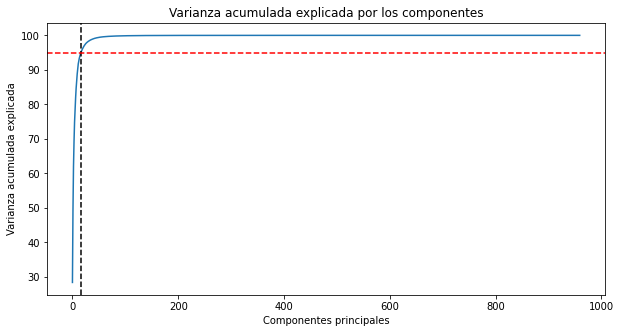

In [12]:
#cuantos componentes explican el 95% de la varianza

varianza_acumulada = (np.cumsum(eigen_valores)/sum(eigen_valores))*100   

k = np.argmax(varianza_acumulada>95)+1

print('{} es el número de componentes principales que explican 95% de la varianza de los datos.'.format(k))
plt.figure(figsize=[10,5])
ax = plt.plot(varianza_acumulada)
plt.title('Varianza acumulada explicada por los componentes')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

In [13]:
raya_17pca, eigen_vectores, eigen_valores = componentes_principales(raya_sc, 17)
print(raya_17pca.shape, eigen_vectores.shape, eigen_valores.shape)

(1280, 17) (960, 17) (17,)


## Reconstruir la imagen con la proyección pca de nuestros datos y los eigen vectores

En lugar de 960 componentes, nos quedamos solamente con 17 que explican el 95% de la varianza.
Lo interesante es que podemos regresar desde la imagen reducida de 17 componentes al tamaño de la imágen original

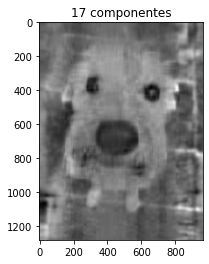

In [14]:

imagen_reconstruida = np.matmul(raya_17pca, eigen_vectores.T) # image reconstruction

fig= plt.figure(figsize=(6,4))
plt.imshow(imagen_reconstruida, cmap=plt.cm.gray)
plt.title('17 componentes')
plt.show()

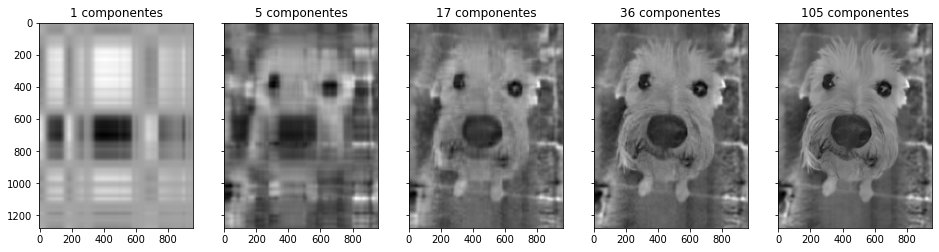

In [15]:
fig, subplots = plt.subplots(1,5, figsize=(16,6), sharey=True, sharex=True)
ks = (1, 5, 17, 36, 105)

for k, ax in zip(ks, subplots):
  raya_kpca, eigen_vectores, eigen_valores = componentes_principales(raya_sc, k)
  imagen_reconstruida = np.matmul(raya_kpca, eigen_vectores.T) # image reconstruction
  plt.subplot(ax)
  plt.imshow(imagen_reconstruida, cmap=plt.cm.gray)
  plt.title(str(k)+' componentes')

In [16]:
varianza_acumulada[:36]

array([28.36860602, 49.13902287, 61.91515322, 69.2031729 , 74.82206008,
       78.62030658, 81.87633822, 84.68250557, 86.88092833, 88.79275168,
       90.34436024, 91.72874576, 92.59022835, 93.38360103, 93.99509273,
       94.52552926, 95.00764405, 95.3892719 , 95.75294834, 96.08591041,
       96.39054141, 96.67777243, 96.93521237, 97.16638929, 97.38436369,
       97.5777436 , 97.74822908, 97.89027226, 98.02746272, 98.15225223,
       98.26462462, 98.36907355, 98.46734234, 98.56118359, 98.64399635,
       98.71763821])

# PCA para una imágen con sklearn


https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [17]:
from sklearn.decomposition import PCA
pca = PCA().fit(raya_sc)

In [18]:
var_exp = pca.explained_variance_ratio_*100
var_acumulada= np.cumsum(var_exp)
k = np.argmax(var_acumulada>95)+1
print('{} es el número de componentes principales que explican 95% de la varianza de los datos.'.format(k))

17 es el número de componentes principales que explican 95% de la varianza de los datos.


In [19]:
pca = PCA(17).fit(raya_sc)
raya_reducida= pca.transform(raya_sc)
raya_reducida.shape


(1280, 17)

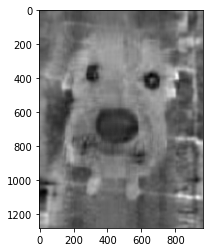

In [20]:
raya_reconstruida = pca.inverse_transform(raya_reducida)
plt.imshow( raya_reconstruida, cmap=plt.cm.gray)
plt.show()


# Tarea :

1. Lectura de: [pca - Making sense of principal component analysis, eigenvectors & eigenvalues](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)


2. Realiza:
* a) el análisis PCA,  con numpy,  para raya_bc centrando los datos (solo centrar, no estandarizar) 
* b) el análisis PCA, con sklearn, para raya bc
* c) compara los resultados de a y b y describe tus observaciones


# Referencias:

1. Wang Z. PCA and SVD explained with numpy [Internet]. Medium. 2019 [citado 24 de noviembre de 2020]. Disponible en: https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. pca - Making sense of principal component analysis, eigenvectors & eigenvalues [Internet]. Cross Validated. [citado 24 de noviembre de 2020]. Disponible en: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

3. Muthuswamy S. Facial Image Compression and Reconstruction with PCA [Internet]. Know Thy Data. 2014 [citado 24 de noviembre de 2020]. Disponible en: https://shankarmsy.github.io/posts/pca-sklearn.html


